In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2

current_dir = 'f:/buaa/python/final_proj'
os.chdir(current_dir)

In [2]:
class SpaceObject():
  def __init__(self, category, name='unknow'):
    self.name = name
    self.category = category # 'sensor', 'debris', 'star' 

class Sensor(SpaceObject):
  def __init__(self, name, time, x, y, z, vx, vy, vz, q1, q2, q3, q4, wx, wy, wz, category='sensor'):
    super().__init__(category, name)
    self.time = pd.to_datetime(time)
    self.position = np.array([x, y, z])
    self.velocity = np.array([vx, vy, vz])
    self.quaternions = np.array([q1, q2, q3, q4])
    self.angular_velocity = np.array([wx, wy, wz])
  
# class Debris(SpaceObject):
#   def __init__(self, name, time, magnitude, semi_major_axis, eccentricity, inclination, raan, arg_of_perigee, true_anomaly, x,y, z,category='debris'):
#     super().__init__(category, name)
#     self.time = pd.to_datetime(time)
#     self.magnitude = magnitude
#     self.orbital_elements = np.array([semi_major_axis, eccentricity, inclination, raan, arg_of_perigee, true_anomaly]).astype(float)
#     self.position = np.array([x, y, z]).astype(float)
#     self.name = name    

class Debris(SpaceObject):
  def __init__(self, name, time, magnitude, x,y, z,category='debris'):
    super().__init__(category, name)
    self.time = pd.to_datetime(time)
    self.magnitude = magnitude
    self.position = np.array([x, y, z]).astype(float)
    self.name = name

class Star(SpaceObject):
  def __init__(self, name, magnitude, x, y, z, right_ascension, declination, category='star'):
    super().__init__(category, name)
    self.name = name
    self.magnitude = float(magnitude)
    self.position = np.array([x, y, z]).astype(float)
    self.as_dec = np.array([right_ascension, declination]).astype(float)

In [3]:
sensor_data = pd.read_csv('data/mysenior_sensor_data_output.csv')
time_list = pd.to_datetime(sensor_data['Time (UTCG)']).to_list()
sensor=[]
for i in range(len(sensor_data)):
  name = 'mysensor'
for sensor_ in sensor_data.iterrows():
  sensor_temp = Sensor(name, sensor_[1]['Time (UTCG)'],sensor_[1]['x (km)'],sensor_[1]['y (km)'],sensor_[1]['z (km)'],sensor_[1]['Velocity x (km/sec)'],sensor_[1]['Velocity y (km/sec)'],sensor_[1]['Velocity z (km/sec)'],sensor_[1]['q1'],sensor_[1]['q2'],sensor_[1]['q3'],sensor_[1]['q4'],sensor_[1]['wx (deg/sec)'],sensor_[1]['wy (deg/sec)'],sensor_[1]['wz (deg/sec)'])
  sensor.append(sensor_temp)

In [4]:
# debris_data = pd.read_csv('data/0_OPS_7898__P_L_1__05678_debris.csv',header=None)
debris_data = pd.read_csv('data/0_ALEXIS_22638_debris_new.csv',header=None)
print(debris_data)

                                0                        1  \
0                     Time (UTCG)  0_ALEXIS_22638 - x (km)   
1        25 Apr 2023 16:00:00.000              5883.347520   
2        25 Apr 2023 16:00:00.100              5883.339160   
3        25 Apr 2023 16:00:00.200              5883.330735   
4        25 Apr 2023 16:00:00.300              5883.322245   
...                           ...                      ...   
9417133  25 Apr 2023 16:09:59.600              1324.942913   
9417134  25 Apr 2023 16:09:59.700              1324.930453   
9417135  25 Apr 2023 16:09:59.800              1324.917977   
9417136  25 Apr 2023 16:09:59.900              1324.905488   
9417137  25 Apr 2023 16:10:00.000              1324.892984   

                               2                        3  
0        0_ALEXIS_22638 - y (km)  0_ALEXIS_22638 - z (km)  
1                    3731.950992             -1565.482013  
2                    3732.256262             -1564.798758  
3              

In [57]:
debris = []
name = 'unknow'
debris_name_list = []
for _ in debris_data.iterrows():
  time = _[1][0]
  if time.startswith('Time (UTCG)'):
    if _[0] != 0:
      debris.append(debris_)
    debris_ = []
    name = _[1][2]
    name = name.rsplit('-',maxsplit=1)[0].replace(' ','')
    debris_name_list.append(name)
    magnitude = np.random.normal(4,0.5)
    continue
  # debris_temp = Debris(name,time,magnitude,_[1][1],_[1][2],_[1][3],_[1][4],_[1][5],_[1][6],_[1][7],_[1][8],_[1][9])
  debris_temp = Debris(name, time, magnitude, _[1][1],_[1][2],_[1][3])
  debris_.append(debris_temp)
debris.append(debris_)

In [164]:
star_data = pd.read_csv('data/Star-100027_star.csv',header=None)
magnitude_data  = pd.read_csv('data/Star-100027_magnitude.csv',header=None)
magnitude = [eval(magnitude_data.iloc[i][0]) for i in range(1,len(magnitude_data),2)]
star = []
star_name_list = []
for _ in star_data.iterrows():
  if _[0]%3 == 0:
    name = _[1][1].rsplit('-',maxsplit=1)[0].replace(' ','')
    star_name_list.append(name)
  if _[0]%3 == 1:
    star_temp = Star(name, magnitude[_[0]//3], _[1][1], _[1][2], _[1][3], _[1][4], _[1][5])
    star.append(star_temp)

In [187]:
# access_data = access = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_OPS_7898__P_L_1__05678_Access.csv')
# access_df = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_OPS_7898__P_L_1__05678_Access.txt',skiprows=17,header=None)
access = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_ALEXIS_22638_Access.csv')
access_df = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_ALEXIS_22638_Access.txt',skiprows=29,header=None)
access_ls = []
access = access.drop(list(range(1,len(access),2)))
access.reset_index(drop=True,inplace=True)

for i in range(len(access_df)):
  if access_df.iloc[i,0].replace(' ','').startswith('Access'):
    access_ls.append(access_df.iloc[i-2,0].split('-',maxsplit=2)[-1])
access['name']=access_ls
access.set_index('name',inplace=True)
access['Start Time (UTCG)'] = pd.to_datetime(access['Start Time (UTCG)'])
access['Stop Time (UTCG)'] = pd.to_datetime(access['Stop Time (UTCG)'])

In [194]:
class DebrisInImage():
  def __init__(self,name,time,u,v,magnitude,category):
    self.name = name
    self.time = time
    self.u = u
    self.v = v
    self.magnitude = magnitude
    self.category = category
    max_magnitude_threshold = 6 #最大星等，也就是最暗的
    #self.gray = 255*2.512**(1-self.magnitude) #0黑 255白  ？
    #self.gray = 255-255*2.512**(self.magnitude-6) #？
    self.gray = 50+10*(6-self.magnitude)  #？
    self.gray = int(self.gray)
    self.gray = 255 if self.gray > 255 else self.gray
    self.gray = 0 if self.gray < 0 else self.gray
    
    
class SpaceImage():
  def __init__(self,time):
    self.time = time
    self.f = 0.01413
    self.dh = 0.000006
    self.dv = 0.000006
    self.visible_debris=[]
    self.visible_star = []

  def rotate(self,sensor):
    self.sensor = sensor
    q = sensor.quaternions
    if q[3] < 0:
      q = -q
    q0, q1, q2, q3 = q
    print(q0, q1, q2, q3)
    Msi = np.array([[q3**2+q0**2-q1**2-q2**2, 2*q3*q2+2*q0*q1,     -2*q3*q1+2*q0*q2],
                    [-2*q3*q2+2*q0*q1,    q3**2-q0**2+q1**2-q2**2, 2*q3*q0+2*q1*q2],
                    [2*q3*q1+2*q0*q2,     -2*q3*q0+2*q1*q2,    q3**2-q0**2-q1**2+q2**2]])
    self.Msi = Msi
    self.euler1 = np.arctan(Msi[2][1]/Msi[2][2])
    self.euler2 = np.arcsin(-Msi[2][0])
    self.euler3 = np.arctan(Msi[1][0]/Msi[0][0])
    return self.Msi
  
  def log_debris(self,debris,debris_name):
    self.debris = debris
    sensor_vec = self.sensor.position
    debris_vec = self.debris.position
    vec = sensor_vec-debris_vec
    distance = np.linalg.norm(vec)
    vec = vec/np.linalg.norm(vec)
    A = np.dot(self.Msi,vec)
    #print(vec,A)
    self.u = self.f*A[0]/(self.dh*A[2])
    self.v = self.f*A[1]/(self.dv*A[2])
    magnitude = self.debris.magnitude
    magnitude = magnitude -30 + 10*np.log10(distance)
    # print('u:',self.u," v:",self.v, 'magnitude:',magnitude)
    debris_temp = DebrisInImage(debris_name,self.time,self.u,self.v,magnitude,'debris')
    self.visible_debris.append(debris_temp)
    return self.u,self.v
  
  def log_star(self,star,star_name):
    # 将位置矢量近似为方向矢量
    vec = star.position
    A = np.dot(self.Msi,vec)
    self.u = self.f*A[0]/(self.dh*A[2])
    self.v = self.f*A[1]/(self.dv*A[2])
    print(star_name, 'u:',self.u," v:",self.v, 'magnitude:',star.magnitude)
    star_temp = DebrisInImage(star_name,self.time,self.u,self.v, star.magnitude,'star')
    self.visible_star.append(star_temp)
    return self.u,self.v
  
  def diffuse_img(img, u, v, gray):
    u = int(u)
    v = int(v)
    diffuse = np.zeros((9,9),dtype=np.uint8)
    print(u,v,gray)
    for i in range(9):
      for j in range(9):
        diffuse[i,j] = int(gray*np.exp(-0.5*((i-4)**2+(j-4)**2)/2))
     # 计算有效区域边界
    img_h, img_w = img.shape
    radius = 4  # 9x9矩阵的半径
    # 计算img中的切片范围
    start_u = max(0, u - radius)
    end_u = min(img_h, u + radius + 1)
    start_v = max(0, v - radius)
    end_v = min(img_w, v + radius + 1)
    print(start_u,end_u,start_v,end_v)
    
    # 计算diffuse中的对应区域
    d_start_u = radius - (u - start_u) if u < radius else 0
    d_end_u = d_start_u + (end_u - start_u)
    d_start_v = radius - (v - start_v) if v < radius else 0
    d_end_v = d_start_v + (end_v - start_v)
    print(d_start_u,d_end_u,d_start_v,d_end_v)
    
    # 矩阵叠加操作
    print(img[start_u:end_u, start_v:end_v].shape,  diffuse[d_start_u:d_end_u, d_start_v:d_end_v].shape)
    print(img[start_u:end_u, start_v:end_v],  diffuse[d_start_u:d_end_u, d_start_v:d_end_v])
    img[start_u:end_u, start_v:end_v] = diffuse[d_start_u:d_end_u, d_start_v:d_end_v]
    return img


    img[int(v)+331-4:int(v)+331+5,int(u)+331-4:int(u)+331+5] += diffuse
    return img
  
  def add_noise(img):
    noise = np.random.normal(50,50,(662,662))
    img = img + noise
    img_clipped = np.clip(img, 0, 255).astype(np.uint8)
    return img_clipped
  
  def plot_image(self):
    # 662*662 焦距f=0.01413m  0.000006m/pixel, alpha = 16.05deg = 2arctan(H/2f), -->H=662
    debris = self.visible_debris
    star = self.visible_star
    img = np.zeros((662,662),dtype=np.uint8)
    # for debris_ in debris:
    #   img = SpaceImage.diffuse_img(img,debris_.u,debris_.v,debris_.gray)
    for star_ in star:
      img = SpaceImage.diffuse_img(img,star_.u,star_.v,star_.gray)
    img = SpaceImage.add_noise(img)
    cv2.imshow('image',img)
    cv2.waitKey(0)
      
    

In [195]:
f = 0.01413
dh = 0.000006
dv = 0.000006
images = []
for curr_time in time_list[0:2]:
  time_index = time_list.index(curr_time)
  visible_star = []
  visible_debris = []
  #统计可见的星和碎片
  for i in range(len(access)):
    if access.iloc[i]['Start Time (UTCG)'] <= curr_time and access.iloc[i]['Stop Time (UTCG)'] >= curr_time:
      if access.index[i] in star_name_list:
        visible_star.append(access.index[i])
      if access.index[i] in debris_name_list:
        visible_debris.append(access.index[i])

  print(len(visible_debris),len(visible_star))
  
  space_image = SpaceImage(curr_time)
  Msi = space_image.rotate(sensor[time_index])

  if len(visible_debris) != 0:
    for debris_name in visible_debris:
      debris_index = debris_name_list.index(debris_name)
      space_image.log_debris(debris[debris_index][time_index],debris_name)
      
  if len(visible_star) != 0:
    for star_name in visible_star:
      star_index = star_name_list.index(star_name)
      space_image.log_star(star[star_index],star_name)

  images.append(space_image)

14 46
-0.615285 -0.645667 0.419724 0.168437
Star-61468 u: 544.4976769267316  v: 43.11952809435318 magnitude: 5.12
Star-61789 u: 501.91072030162496  v: 7.579203607754586 magnitude: 4.63
Star-62683 u: 352.69288588485347  v: -213.74595965869028 magnitude: 4.9
Star-62867 u: 495.8343098803777  v: 400.10128909249624 magnitude: 4.33
Star-62896 u: 396.53040467513057  v: 41.147860063874475 magnitude: 4.25
Star-63724 u: 431.73767032711237  v: 442.37957438568844 magnitude: 4.83
Star-63945 u: 399.96646646863695  v: 403.2200893730067 magnitude: 4.71
Star-64004 u: 414.1471407194257  v: 464.35124329783156 magnitude: 4.27
Star-64166 u: 61.782964632999196  v: -607.1273771041534 magnitude: 4.94
Star-64408 u: 223.46625458109958  v: -11.276572193611237 magnitude: 4.85
Star-64803 u: 102.78680524031343  v: -245.32528046878994 magnitude: 5.1
Star-64962 u: -28.564975296901142  v: -572.9716505674336 magnitude: 2.99
Star-65109 u: 142.48626561836045  v: -31.618479149800283 magnitude: 2.75
Star-65535 u: 142.14978

In [172]:
images[0].plot_image()

618 43 58
614 623 39 48
0 9 0 9
(9, 9) (9, 9)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]] [[ 0  0  0  0  1  0  0  0  0]
 [ 0  0  2  4  6  4  2  0  0]
 [ 0  2  7 16 21 16  7  2  0]
 [ 0  4 16 35 45 35 16  4  0]
 [ 1  6 21 45 58 45 21  6  1]
 [ 0  4 16 35 45 35 16  4  0]
 [ 0  2  7 16 21 16  7  2  0]
 [ 0  0  2  4  6  4  2  0  0]
 [ 0  0  0  0  1  0  0  0  0]]
574 7 63
570 579 3 12
0 9 0 9
(9, 9) (9, 9)
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]] [[ 0  0  0  0  1  0  0  0  0]
 [ 0  0  2  5  6  5  2  0  0]
 [ 0  2  8 18 23 18  8  2  0]
 [ 0  5 18 38 49 38 18  5  0]
 [ 1  6 23 49 63 49 23  6  1]
 [ 0  5 18 38 49 38 18  5  0]
 [ 0  2  8 18 23 18  8  2  0]
 [ 0  0  2  5  6  5  2  0  0]
 [ 0  0  0  0  1  0

ValueError: could not broadcast input array from shape (9,0) into shape (9,453)

In [140]:
def apply_diffuse(img, diffuse, u, v):
    """
    在img的(u,v)中心点叠加9x9扩散矩阵
    自动处理边界溢出，支持numpy和PyTorch张量
    
    参数：
    img: 输入图像矩阵 (662x662)
    diffuse: 扩散矩阵 (9x9)
    u, v: 中心点坐标 (从0开始)
    """
    # 计算有效区域边界
    img_h, img_w = img.shape
    radius = 4  # 9x9矩阵的半径
    
    # 计算img中的切片范围
    start_u = max(0, u - radius)
    end_u = min(img_h, u + radius + 1)
    start_v = max(0, v - radius)
    end_v = min(img_w, v + radius + 1)
    
    # 计算diffuse中的对应区域
    d_start_u = radius - (u - start_u) if u < radius else 0
    d_end_u = d_start_u + (end_u - start_u)
    d_start_v = radius - (v - start_v) if v < radius else 0
    d_end_v = d_start_v + (end_v - start_v)
    
    # 矩阵叠加操作
    img[start_u:end_u, start_v:end_v] += diffuse[d_start_u:d_end_u, d_start_v:d_end_v]
    return img

# 初始化测试数据
img = np.zeros((662, 662), dtype=np.float32)
diffuse = np.ones((9, 9), dtype=np.float32)

# 在边缘位置叠加 (测试边界处理)
img = apply_diffuse(img, diffuse, u=2, v=5)

# 在中心位置叠加
# img = apply_diffuse(img, diffuse, u=330, v=330)

cv2.imshow('image',img)
cv2.waitKey(0)

-1

# no CLASS

In [92]:
sensor = pd.read_csv('data/mysenior_sensor_data_output.csv')
sensor['Time (UTCG)'] = pd.to_datetime(sensor['Time (UTCG)'])
sensor = sensor.set_index('Time (UTCG)')

In [ ]:
debris_all = pd.read_csv('data/0_OPS_7898__P_L_1__05678_debris.csv',header=None)
debris = [debris_all[i:i + 6002] for i in range(0, len(debris_all), 6002)]
debris_index = []
for i in range(len(debris)):
  columns = debris[i].iloc[0]
  name = columns[2].rsplit('-',maxsplit=1)[0].replace(' ','')
  debris_index.append(name)
  for j in range(1,len(columns)):
    columns[j] = columns[j].split('-')[-1]
  debris[i].columns = debris[i].iloc[0]
  debris[i] = debris[i][1:]
  debris[i].reset_index(drop=True, inplace=True)
  debris[i]['name'] = [name]*len(debris[i])
  debris[i]['Time (UTCG)'] = pd.to_datetime(debris[i]['Time (UTCG)'])
  debris[i].set_index('Time (UTCG)', inplace=True)

  numeric_columns = columns[1:]
  print(numeric_columns)
  debris[i][numeric_columns] = debris[i][numeric_columns].apply(pd.to_numeric, errors='coerce')
print(debris[10])

In [ ]:
debris_dict = {}
for i in range(len(debris)):
  debris_dict[debris_index[i]] = debris[i]

In [172]:
star_data = pd.read_csv('data/Star-100027_star.csv',header=None)
magnitude_data = pd.read_csv('data/Star-100027_magnitude.csv',header=None)
columns = ['x', 'y', 'z', 'Right Ascension (deg)', 'Declination (deg)']
names = [star_data.iloc[i][1].rsplit('-',maxsplit=1)[0].replace(' ','') for i in range(0,len(star_data),3)]
magnitude = [magnitude_data.iloc[i][0] for i in range(1,len(magnitude_data),2)]
star = star_data.iloc[1::3]
star.drop(star.columns[0],axis=1,inplace=True)
star.columns = columns
star['magnitude'] = magnitude
star['name'] = names
star = star.reset_index(drop=True)
star.set_index('name',inplace=True)
print(star.head())

                    x          y          z Right Ascension (deg)  \
name                                                                
Star-100027  0.551728  -0.805413  -0.216579               304.412   
Star-100044  0.445529  -0.649544   0.616114               304.447   
Star-100064  0.553080  -0.804316  -0.217204               304.514   
Star-100122  0.465987  -0.673906   0.573330               304.663   
Star-100310  0.561725  -0.797301  -0.220854               305.166   

            Declination (deg) magnitude  
name                                     
Star-100027           -12.508  4.300000  
Star-100044            38.033  4.770000  
Star-100064           -12.545  3.580000  
Star-100122            34.983  5.140000  
Star-100310           -12.759  4.770000  


C:\Users\clyde\AppData\Local\Temp\ipykernel_63852\3190999952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star.drop(star.columns[0],axis=1,inplace=True)
C:\Users\clyde\AppData\Local\Temp\ipykernel_63852\3190999952.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star['magnitude'] = magnitude
C:\Users\clyde\AppData\Local\Temp\ipykernel_63852\3190999952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
access = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_OPS_7898__P_L_1__05678_Access.csv')
access_df = pd.read_csv('data/Satellite-observe-Sensor-mysenior-To-Satellite-0_OPS_7898__P_L_1__05678_Access.txt',skiprows=17,header=None)
access_ls = []
access = access.drop(list(range(1,len(access),2)))
access.reset_index(drop=True,inplace=True)

for i in range(len(access_df)):
  if access_df.iloc[i,0].replace(' ','').startswith('Access'):
    access_ls.append(access_df.iloc[i-2,0].split('-',maxsplit=2)[-1])
access['name']=access_ls
access.set_index('name',inplace=True)
access['Start Time (UTCG)'] = pd.to_datetime(access['Start Time (UTCG)'])
access['Stop Time (UTCG)'] = pd.to_datetime(access['Stop Time (UTCG)'])

print(access)

In [ ]:
class DebrisInImage():
  def __init__(self,name,time,u,v):
    self.name = name
    self.time = time
    self.u = u
    self.v = v
    
class SpaceImage():
  def __init__(self,time):
    self.time = time
    self.f = 0.01413
    self.dh = 0.000006
    self.dv = 0.000006
    self.debris=[]

  def rotate(self,sensor):
    self.sensor = sensor
    q0 = sensor.loc[self.time]['q1']
    q1 = sensor.loc[self.time]['q2']
    q2 = sensor.loc[self.time]['q3']
    q3 = sensor.loc[self.time]['q4']
    if q3 < 0:
      q0 = -q0
      q1 = -q1
      q2 = -q2
      q3 = -q3
    Msi = np.array([[q3**2+q0**2-q1**2-q2**2, 2*q3*q2+2*q0*q1,     -2*q3*q1+2*q0*q2],
                    [-2*q3*q2+2*q0*q1,    q3**2-q0**2+q1**2-q2**2, 2*q3*q0+2*q1*q2],
                    [2*q3*q1+2*q0*q2,     -2*q3*q0+2*q1*q2,    q3**2-q0**2-q1**2+q2**2]])
    self.Msi = Msi
    self.euler1 = np.arctan(Msi[2][1]/Msi[2][2])
    self.euler2 = np.arcsin(-Msi[2][0])
    self.euler3 = np.arctan(Msi[1][0]/Msi[0][0])
    return self.Msi
  
  def log_debris(self,debris_dict,debris_name):
    self.debris_dict = debris_dict
    sensor_vec = self.sensor.loc[self.time][['x (km)','y (km)','z (km)']]
    sensor_vec = np.array(sensor_vec)
    debris_vec = debris_dict[debris_name].loc[self.time][[' x (km)',' y (km)',' z (km)']]
    debris_vec = np.array(debris_vec)
    vec = debris_vec - sensor_vec
    A = np.dot(self.Msi,vec)
    self.u = self.f*A[0]/(self.dh*A[2])
    self.v = self.f*A[1]/(self.dv*A[2])
    print('u:',self.u," v:",self.v)
    debris_temp = DebrisInImage(debris_name,self.time,self.u,self.v)
    self.debris.append(debris_temp)
    return self.u,self.v
  
  def plot_image(self):
    plt.figure()
    plt.plot(self.u,self.v,'ro')
    plt.show()
    

In [ ]:
f = 0.01413
dh = 0.000006
dv = 0.000006
images = []
for curr_time in time_ls[:100]:
  visible_star = []
  visible_debris = []
  for i in range(len(access)):
    if access.iloc[i]['Start Time (UTCG)'] <= curr_time and access.iloc[i]['Stop Time (UTCG)'] >= curr_time:
      if access.index[i] in star_index:
        visible_star.append(access.index[i])
      if access.index[i] in debris_index:
        visible_debris.append(access.index[i])
  if len(visible_debris) != 0:
    print('Time:',curr_time)

    space_image = SpaceImage(curr_time)
    Msi = space_image.rotate(sensor)
    for target in visible_debris:
      space_image.log_debris(debris_dict,target)
    images.append(space_image)

Time: 2023-04-25 16:00:00
u: 508.6703870220906  v: -39.18639744956534
Time: 2023-04-25 16:00:00.100000
u: 508.88089943245484  v: -38.338754347374525
Time: 2023-04-25 16:00:00.200000
u: 509.0891405803004  v: -37.48878703237677
Time: 2023-04-25 16:00:00.300000
u: 509.29966966296166  v: -36.64046017937454
Time: 2023-04-25 16:00:00.400000
u: 509.51108690487473  v: -35.79314455667991
Time: 2023-04-25 16:00:00.500000
u: 509.71635502249063  v: -34.942242394676576
Time: 2023-04-25 16:00:00.600000
u: 509.92778381115266  v: -34.094242268145635
Time: 2023-04-25 16:00:00.700000
u: 510.1321686890915  v: -33.24407192211106
Time: 2023-04-25 16:00:00.800000
u: 510.343611258338  v: -32.39538548060475
Time: 2023-04-25 16:00:00.900000
u: 510.55418703195375  v: -31.545001259650686
Time: 2023-04-25 16:00:01
u: 510.7603698276471  v: -30.6937383327896
Time: 2023-04-25 16:00:01.100000
u: 510.9709628713464  v: -29.842670261499787
Time: 2023-04-25 16:00:01.200000
u: 511.17926524159316  v: -28.989274424768254
Ti

METEOR_1-5_04419
2023-04-25 16:00:00


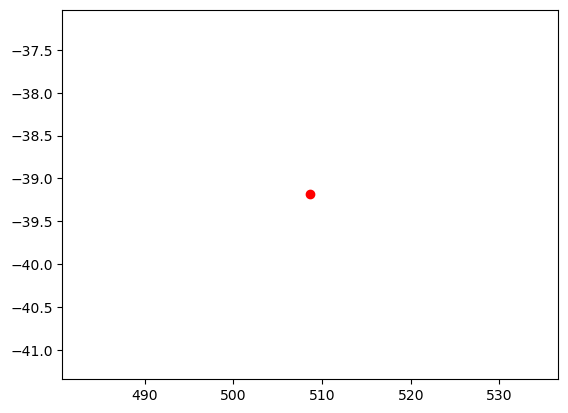

METEOR_1-5_04419
2023-04-25 16:00:00.100000


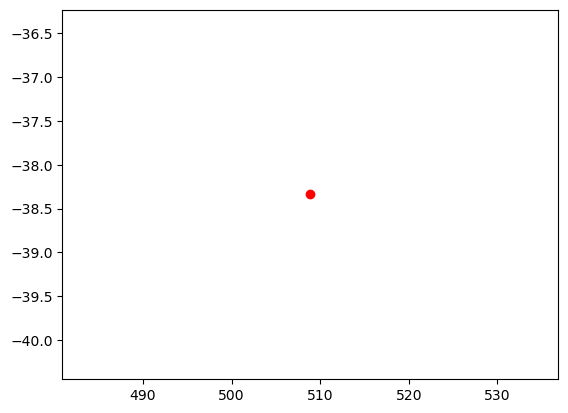

METEOR_1-5_04419
2023-04-25 16:00:00.200000


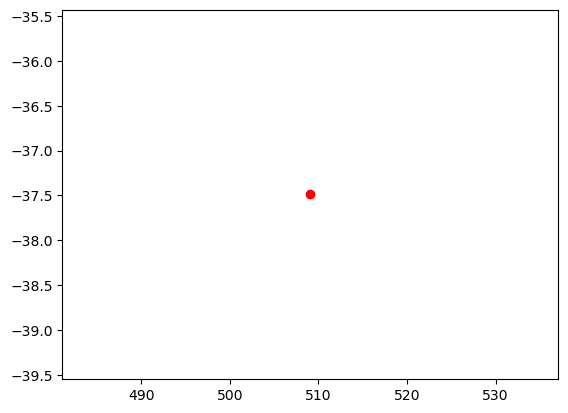

METEOR_1-5_04419
2023-04-25 16:00:00.300000


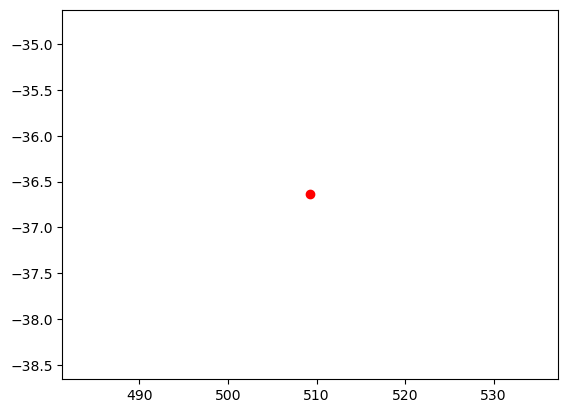

METEOR_1-5_04419
2023-04-25 16:00:00.400000


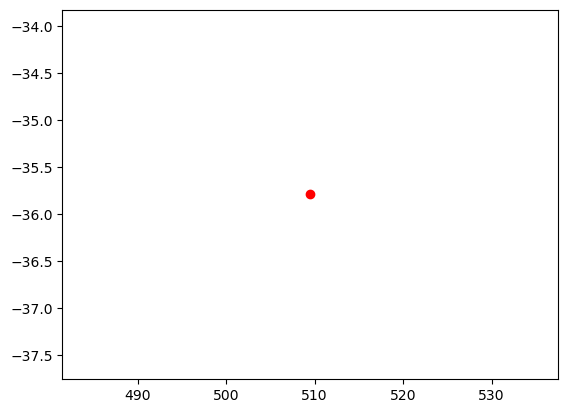

METEOR_1-5_04419
2023-04-25 16:00:00.500000


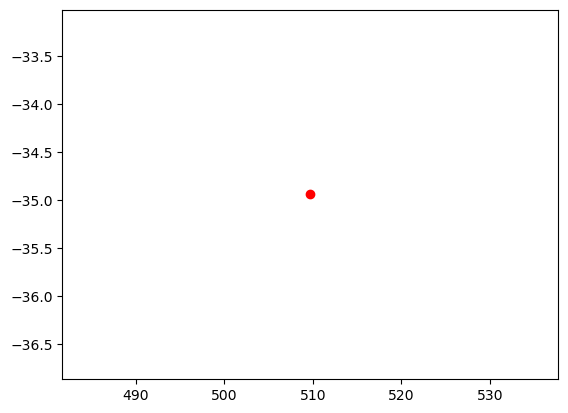

METEOR_1-5_04419
2023-04-25 16:00:00.600000


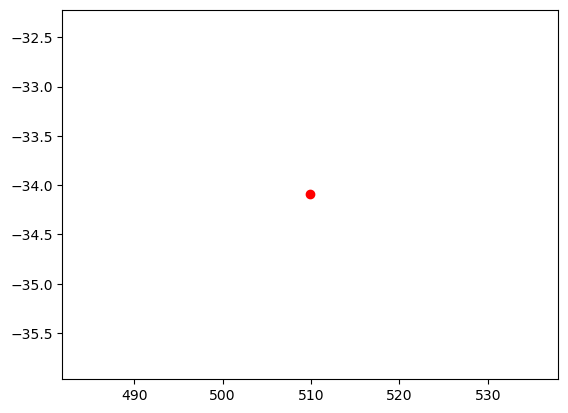

METEOR_1-5_04419
2023-04-25 16:00:00.700000


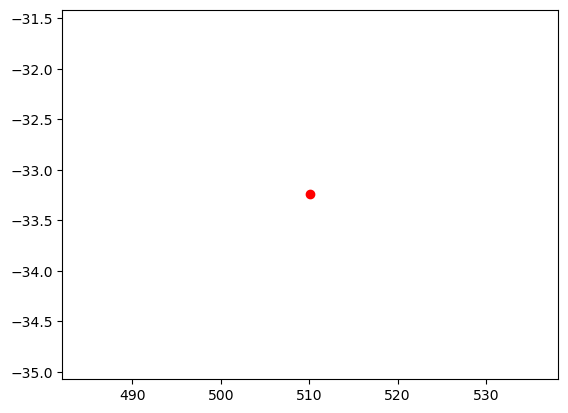

METEOR_1-5_04419
2023-04-25 16:00:00.800000


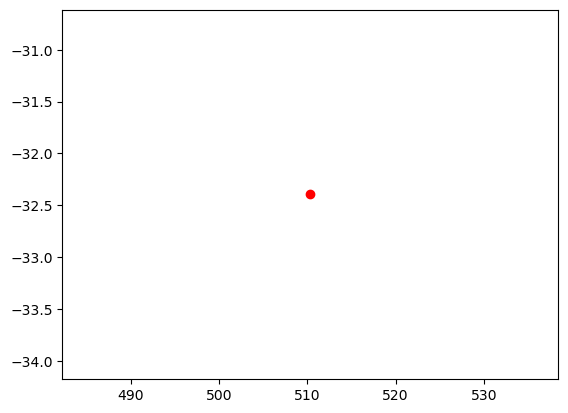

METEOR_1-5_04419
2023-04-25 16:00:00.900000


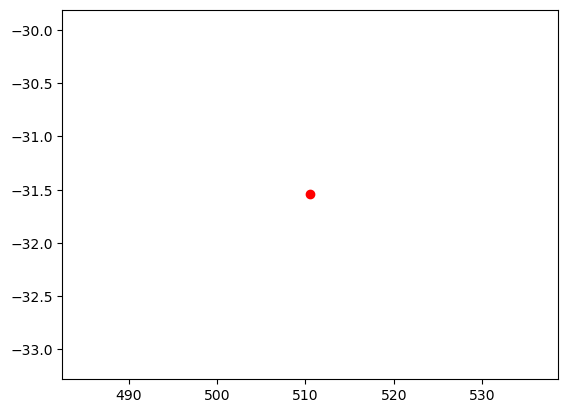

METEOR_1-5_04419
2023-04-25 16:00:01


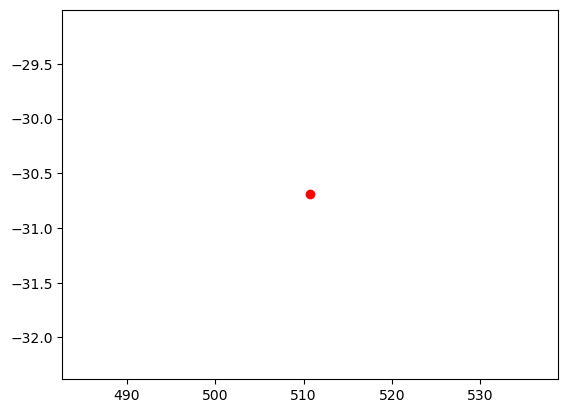

METEOR_1-5_04419
2023-04-25 16:00:01.100000


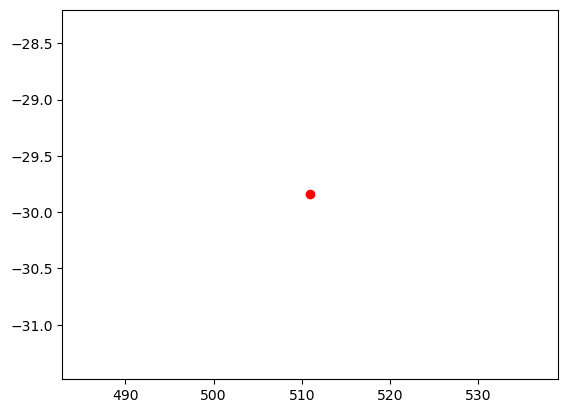

METEOR_1-5_04419
2023-04-25 16:00:01.200000


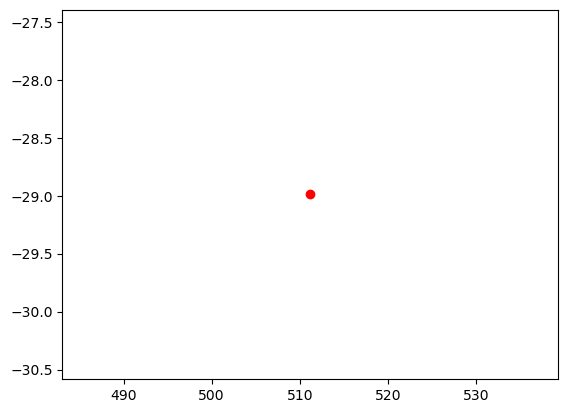

METEOR_1-5_04419
2023-04-25 16:00:01.300000


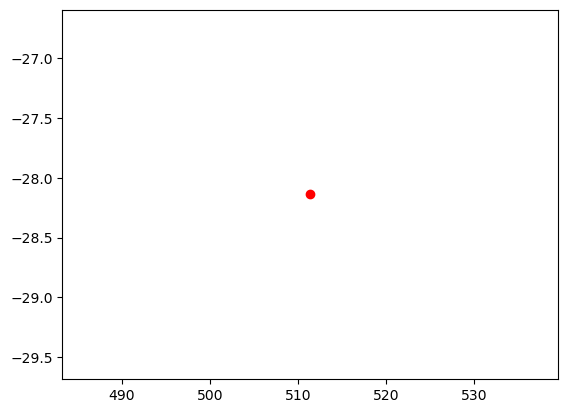

METEOR_1-5_04419
2023-04-25 16:00:01.400000


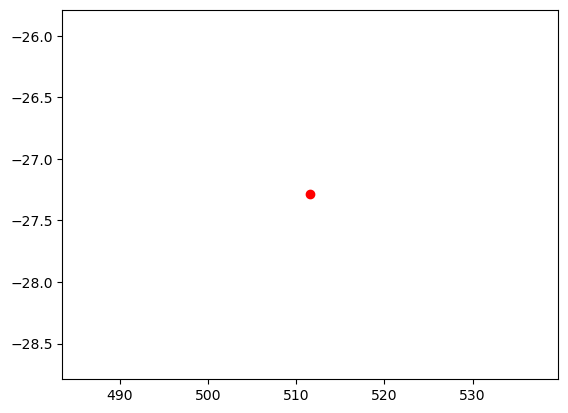

METEOR_1-5_04419
2023-04-25 16:00:01.500000


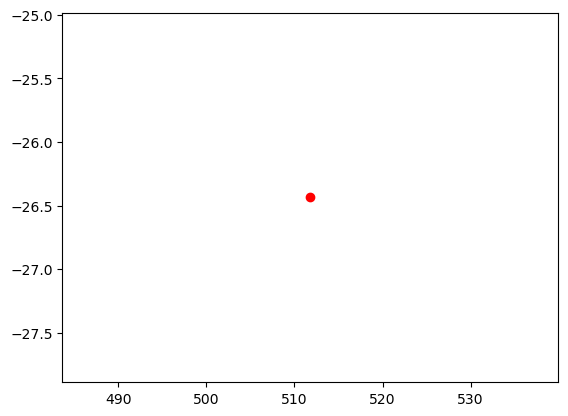

METEOR_1-5_04419
2023-04-25 16:00:01.600000


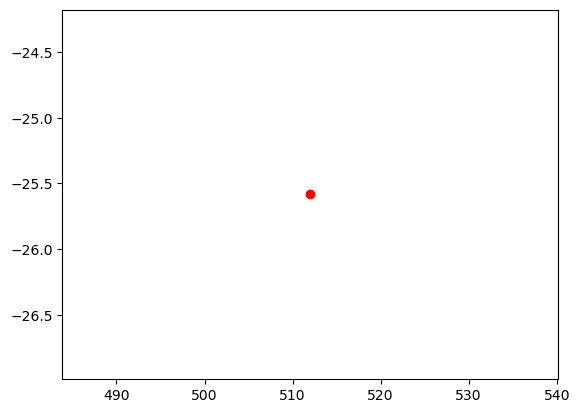

METEOR_1-5_04419
2023-04-25 16:00:01.700000


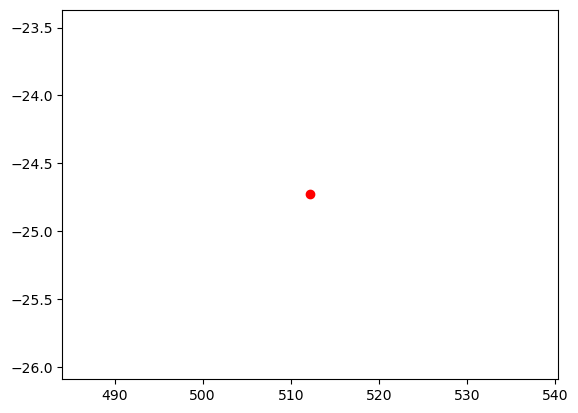

METEOR_1-5_04419
2023-04-25 16:00:01.800000


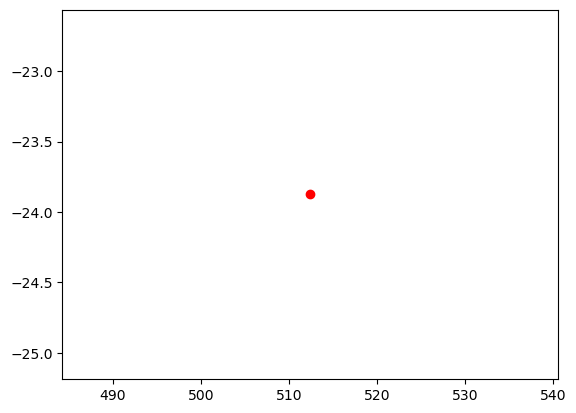

METEOR_1-5_04419
2023-04-25 16:00:01.900000


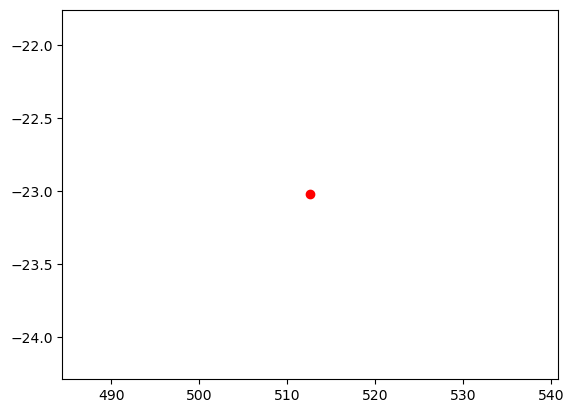

METEOR_1-5_04419
2023-04-25 16:00:02


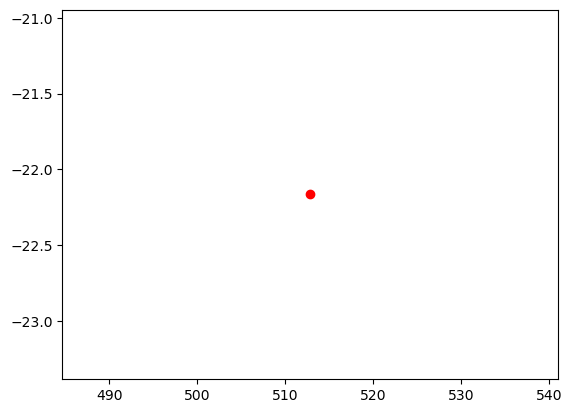

METEOR_1-5_04419
2023-04-25 16:00:02.100000


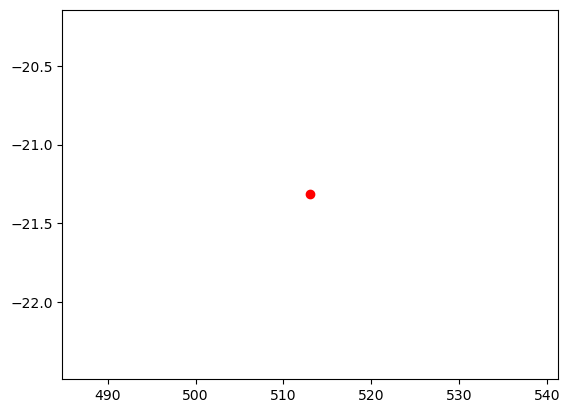

METEOR_1-5_04419
2023-04-25 16:00:02.200000


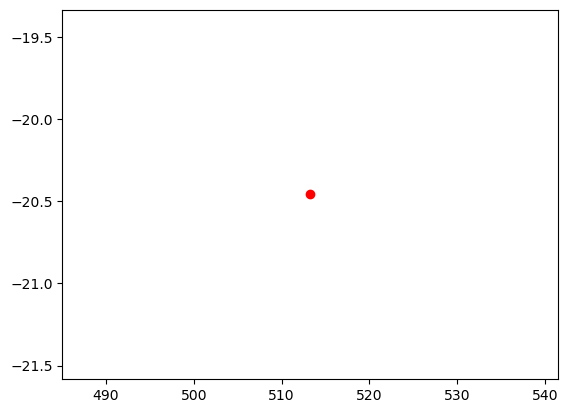

METEOR_1-5_04419
2023-04-25 16:00:02.300000


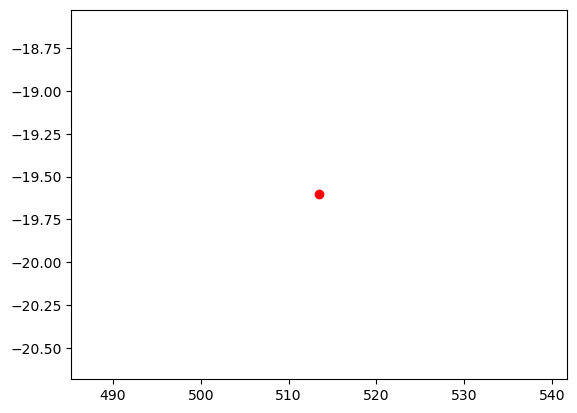

METEOR_1-5_04419
2023-04-25 16:00:02.400000


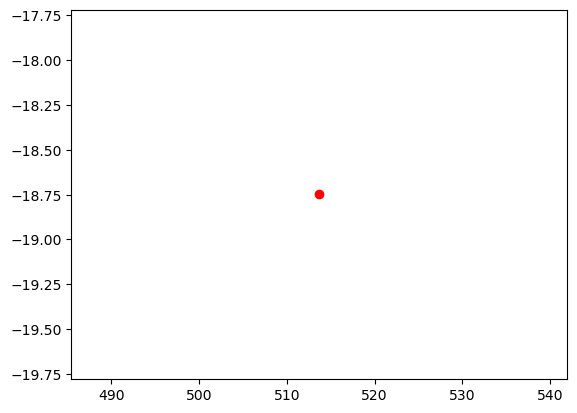

METEOR_1-5_04419
2023-04-25 16:00:02.500000


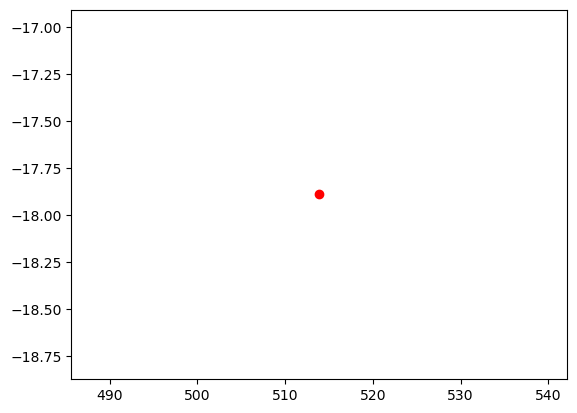

METEOR_1-5_04419
2023-04-25 16:00:02.600000


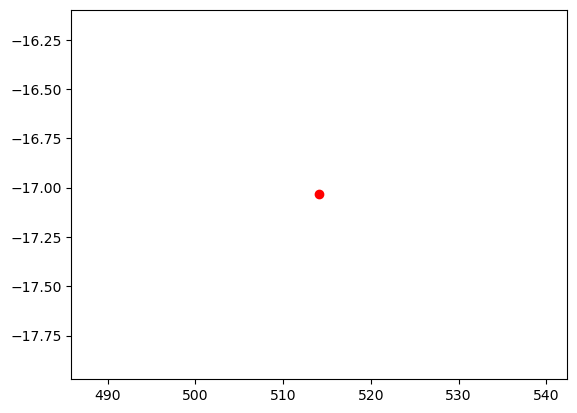

METEOR_1-5_04419
2023-04-25 16:00:02.700000


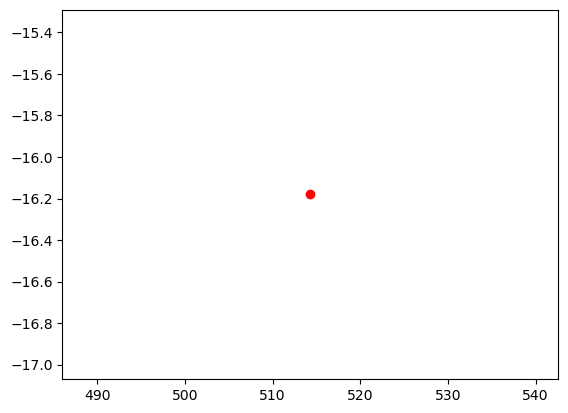

METEOR_1-5_04419
2023-04-25 16:00:02.800000


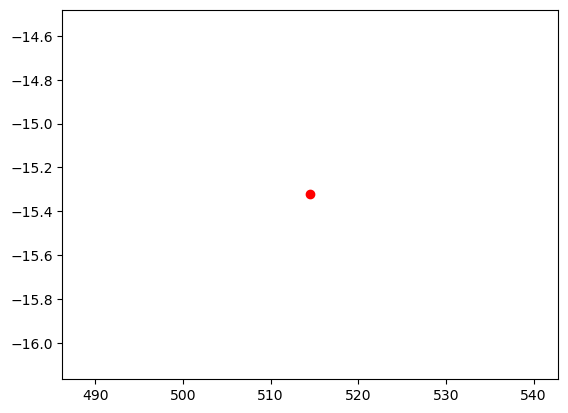

METEOR_1-5_04419
2023-04-25 16:00:02.900000


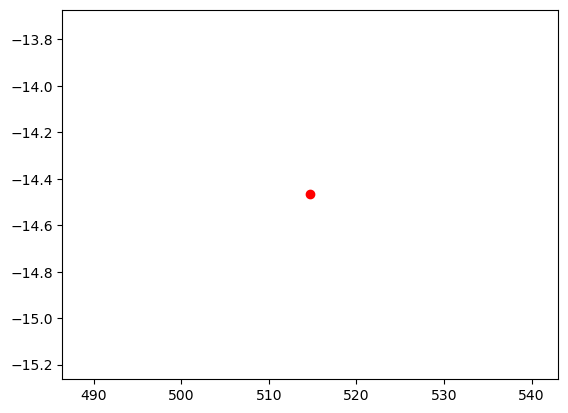

METEOR_1-5_04419
2023-04-25 16:00:03


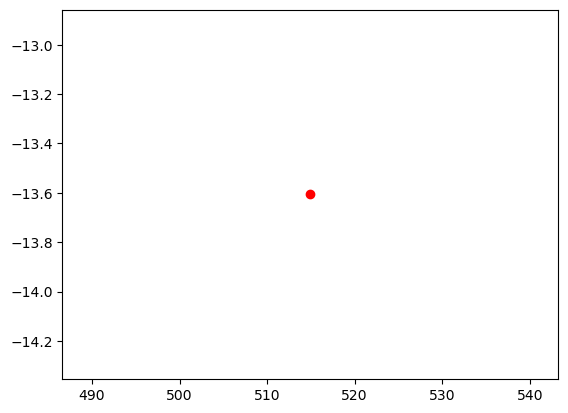

METEOR_1-5_04419
2023-04-25 16:00:03.100000


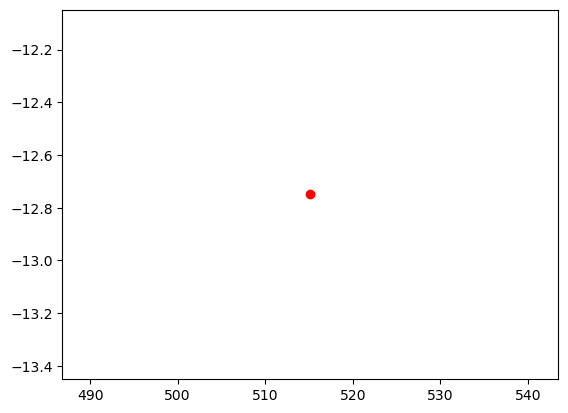

METEOR_1-5_04419
2023-04-25 16:00:03.200000


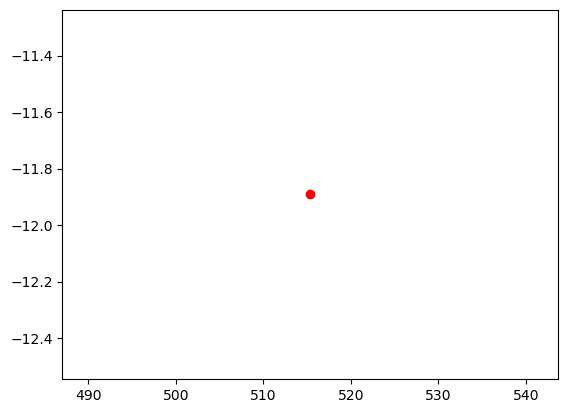

METEOR_1-5_04419
2023-04-25 16:00:03.300000


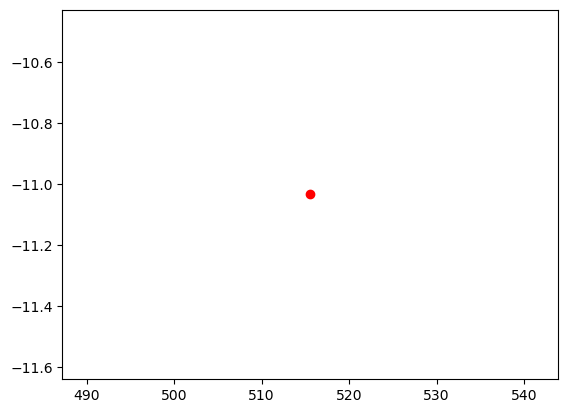

METEOR_1-5_04419
2023-04-25 16:00:03.400000


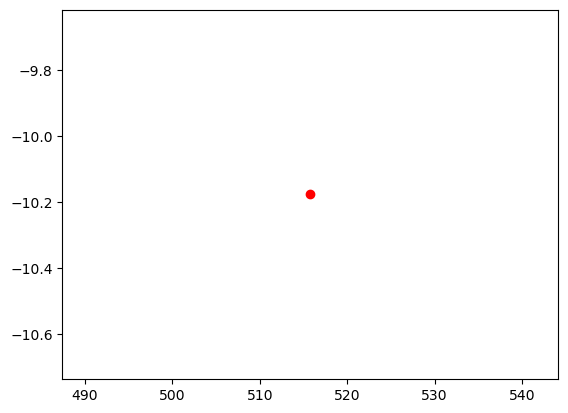

METEOR_1-5_04419
2023-04-25 16:00:03.500000


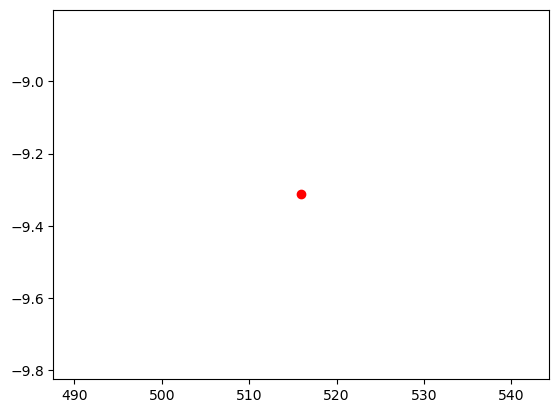

METEOR_1-5_04419
2023-04-25 16:00:03.600000


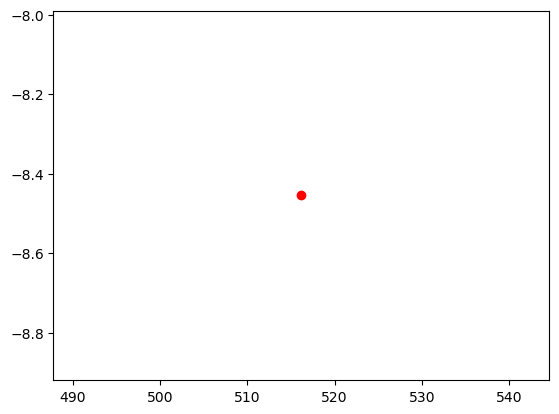

METEOR_1-5_04419
2023-04-25 16:00:03.700000


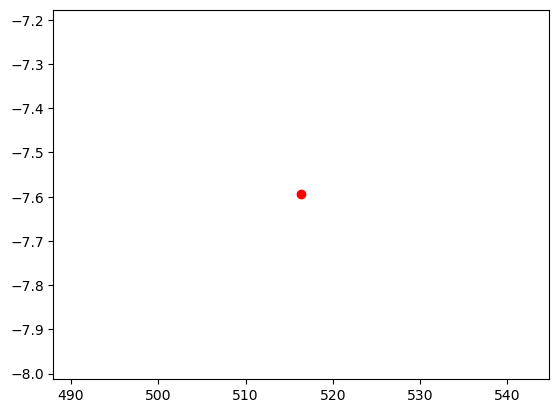

METEOR_1-5_04419
2023-04-25 16:00:03.800000


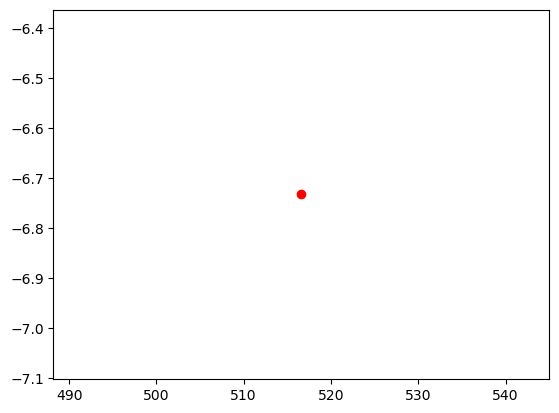

METEOR_1-5_04419
2023-04-25 16:00:03.900000


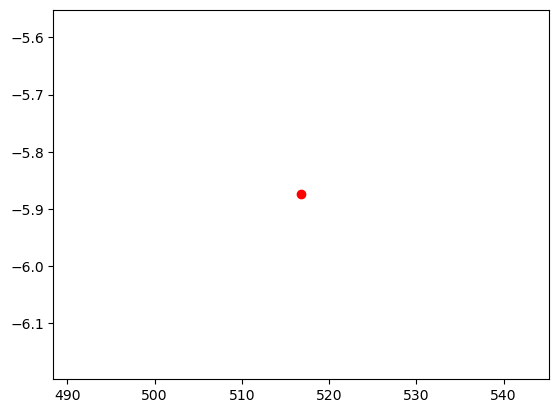

METEOR_1-5_04419
2023-04-25 16:00:04


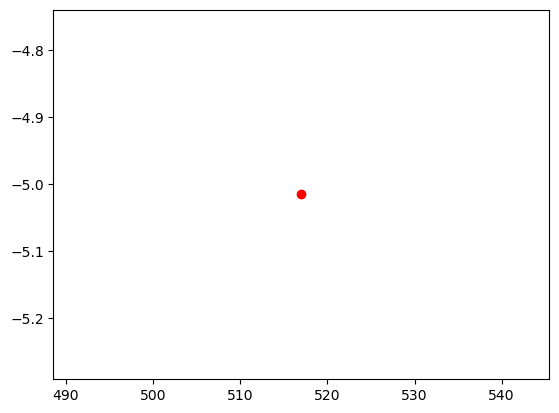

METEOR_1-5_04419
2023-04-25 16:00:04.100000


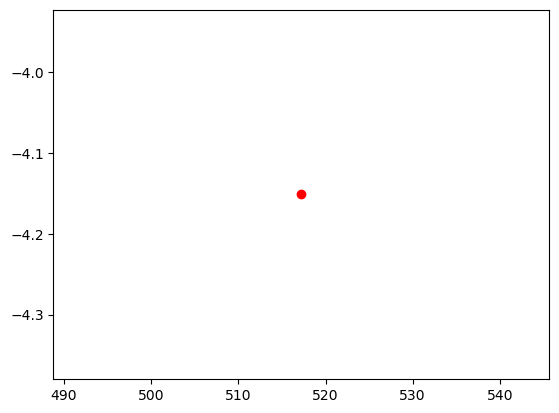

METEOR_1-5_04419
2023-04-25 16:00:04.200000


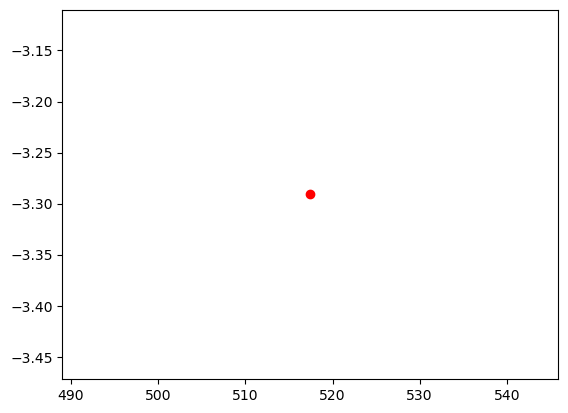

METEOR_1-5_04419
2023-04-25 16:00:04.300000


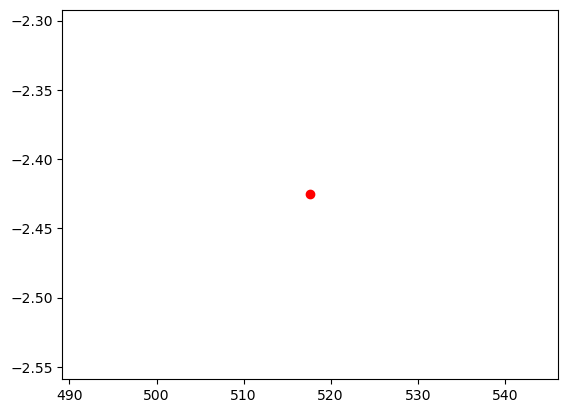

METEOR_1-5_04419
2023-04-25 16:00:04.400000


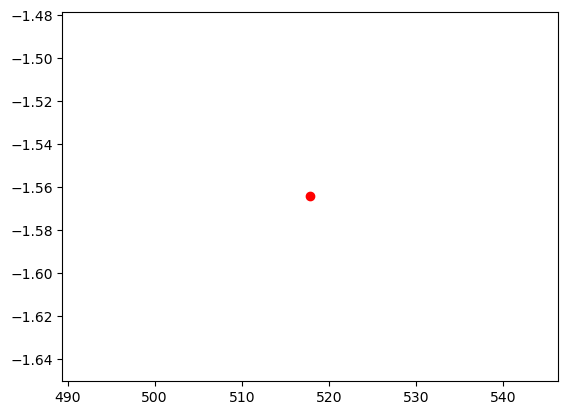

METEOR_1-5_04419
2023-04-25 16:00:04.500000


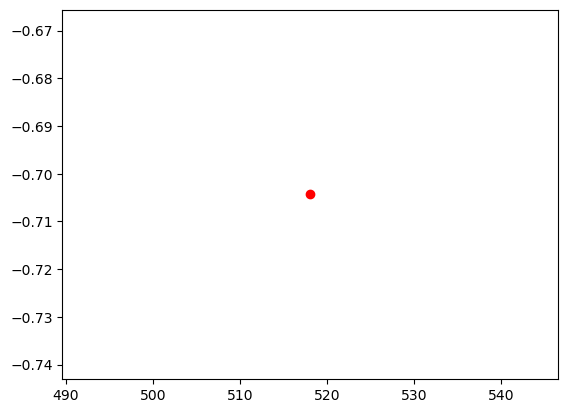

METEOR_1-5_04419
2023-04-25 16:00:04.600000


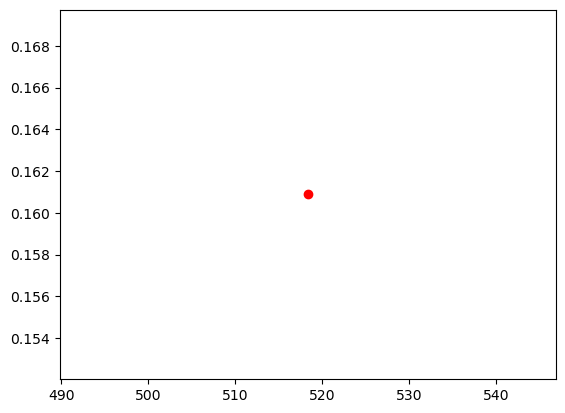

METEOR_1-5_04419
2023-04-25 16:00:04.700000


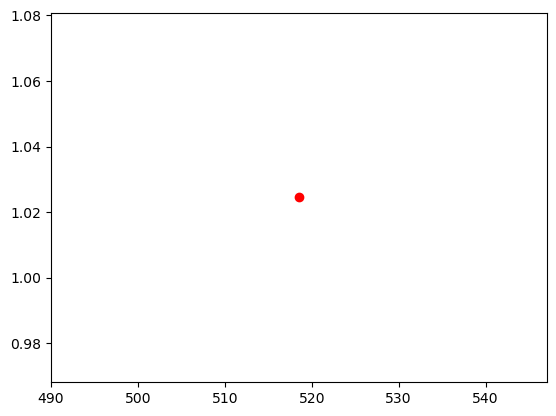

METEOR_1-5_04419
2023-04-25 16:00:04.800000


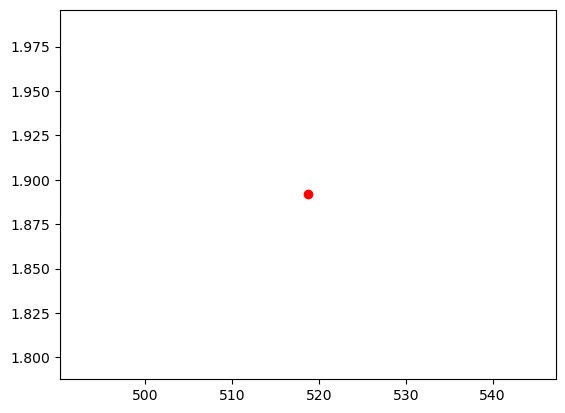

METEOR_1-5_04419
2023-04-25 16:00:04.900000


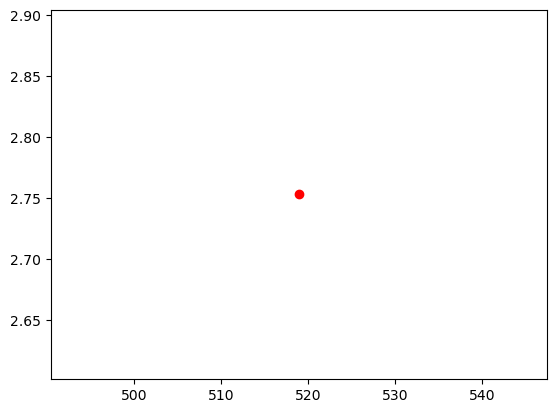

METEOR_1-5_04419
2023-04-25 16:00:05


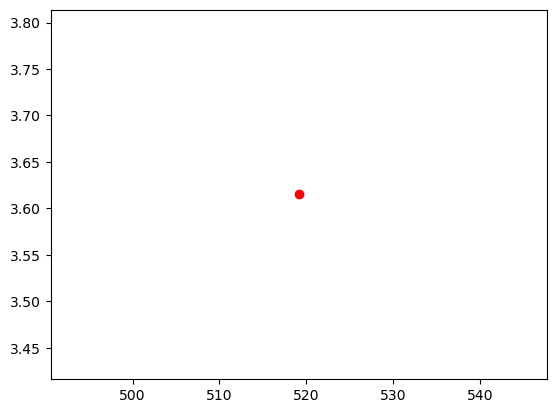

METEOR_1-5_04419
2023-04-25 16:00:05.100000


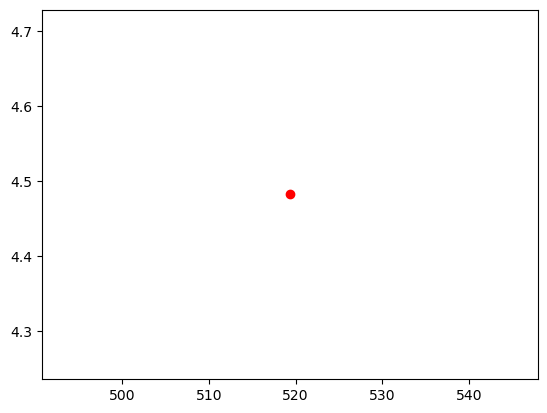

METEOR_1-5_04419
2023-04-25 16:00:05.200000


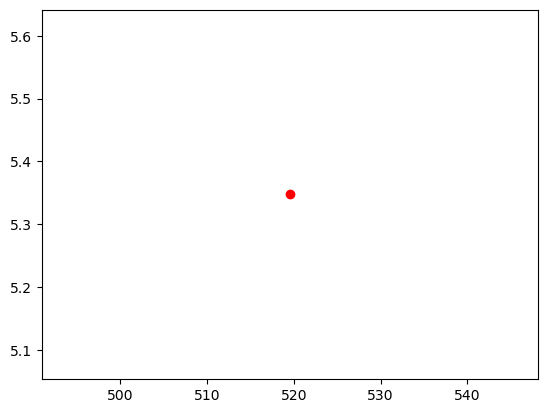

METEOR_1-5_04419
2023-04-25 16:00:05.300000


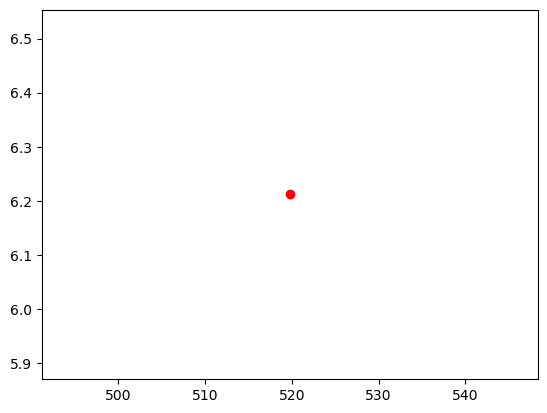

METEOR_1-5_04419
2023-04-25 16:00:05.400000


KeyboardInterrupt: 

In [192]:
for i in range(len(images)):
  print(images[i].debris[0].name)
  print(images[i].debris[0].time)
  images[i].plot_image()

In [ ]:

sensor_boresight_point_llr = pd.read_csv('data/mysenior_Boresight_Grazing_Point_LLR.csv')
observe_euler_angles = pd.read_csv('data/observe_Euler_Angles.csv')
observe_inertial_p_v = pd.read_csv('data/observe_Inertial_Position_Velocity.csv')
observe_ypr = pd.read_csv('data/observe_Yaw_Pitch_Roll.csv')
observe_access = pd.read_csv('data/observe_short.csv')
satellites_inertial_p_v = pd.read_csv('data/0_OPS_7898__P_L_1__05678_Inertial_Position_Velocity.csv')

# 获取编目目标名称列表
line_num = np.arange(3-1,16)
statellites_names = []
with open('data/observe_short.txt', 'r') as f:
  for i, line in enumerate(f):
    if i in line_num:
      names = line.replace('\n', '').replace(' ','').split(',')
      statellites_names+=names
    if i == 16:
      break
for i in range(len(statellites_names)):
  statellites_names[i] = statellites_names[i].split('-',maxsplit=1)[-1]
print(statellites_names)

# 处理access文件，把无意义的标注行去掉
observe_access = observe_access.drop(list(range(1,len(observe_access),2)))
observe_access = observe_access.reset_index(drop=True)

# 获取能观测到的目标的名称
df = pd.read_csv('data/observe_short.txt',skiprows=16,header=None)

exit_satellites = []
for i in range(len(df)):
  if df.iloc[i,0].replace(' ','').startswith('Access'):
    exit_satellites.append(df.iloc[i-2,0].split('-',maxsplit=2)[-1])
observe_access['name']=exit_satellites
observe_access.set_index('name',inplace=True)

# 将目标分表
target_dic = {}
line_index = satellites_inertial_p_v[satellites_inertial_p_v["Time (UTCG)"]=="Time (UTCG)"].index
satellites_inertial_p_v = satellites_inertial_p_v.drop(line_index)
satellites_inertial_p_v = satellites_inertial_p_v.reset_index(drop=True)
debris = [satellites_inertial_p_v[i:i + 6001] for i in range(0, len(satellites_inertial_p_v), 6001)]
for i in range(len(debris)):
  target_dic[statellites_names[i]] = debris[i]


['0_OPS_7898__P_L_1__05678', '0_OPS_7898__P_L_1__05680', '0_OPS_7898__P_L_1__05681', '0_OPS_7898__P_L_1__05682', 'A-1_01778', 'ALOUETTE_1_00424', 'ALOUETTE_2_01804', 'ANNA_1B_00446', 'AO-3_01293', 'AO-5_04321', 'AO-6_06236', 'ASTEX_1_05560', 'AUREOLE_1_05729', 'AZUR_04221', 'BLACK_ARROW_05580', 'CALSPHERE_1_00900', 'CALSPHERE_2_00902', 'CALSPHERE_4A_01520', 'CAS-A_05435', 'COPERNICUS_06153', 'COSMOS_158_02801', 'COSMOS_192_03047', 'COSMOS_198_03081', 'COSMOS_203_03129', 'COSMOS_209_03158', 'COSMOS_220_03229', 'COSMOS_249_03504', 'COSMOS_252_03530', 'COSMOS_256_03576', 'COSMOS_272_03818', 'COSMOS_292_04070', 'COSMOS_304_04138', 'COSMOS_312_04254', 'COSMOS_332_04369', 'COSMOS_336_04383', 'COSMOS_337_04384', 'COSMOS_338_04385', 'COSMOS_339_04386', 'COSMOS_340_04387', 'COSMOS_341_04388', 'COSMOS_342_04389', 'COSMOS_343_04390', 'COSMOS_367_04564', 'COSMOS_371_04578', 'COSMOS_372_04588', 'COSMOS_374_04594', 'COSMOS_375_04598', 'COSMOS_381_04783', 'COSMOS_385_04799', 'COSMOS_394_04922', 'COSM

In [ ]:
# sensor_boresight_point_llr, 星敏轴指向的经纬度
# observe_euler_angles, 卫星的欧拉角
# observe_inertial_p_v, 卫星的位置速度
# observe_ypr, 卫星的偏航俯仰滚转角
# observe_access, 目标的可见性
# satellites_inertial_p_v, 目标的位置速度
# taget_dic, 目标的字典，每个目标对应一个dataframe
# statellites_names 目标的名称列表

# sensor_boresight_point_llr, observe_euler_angles, observe_inertial_p_v, observe_ypr, observe_access, satellites_inertial_p_v, taget_dic, statellites_names = read_files()


['0_OPS_7898__P_L_1__05678', '0_OPS_7898__P_L_1__05680', '0_OPS_7898__P_L_1__05681', '0_OPS_7898__P_L_1__05682', 'A-1_01778', 'ALOUETTE_1_00424', 'ALOUETTE_2_01804', 'ANNA_1B_00446', 'AO-3_01293', 'AO-5_04321', 'AO-6_06236', 'ASTEX_1_05560', 'AUREOLE_1_05729', 'AZUR_04221', 'BLACK_ARROW_05580', 'CALSPHERE_1_00900', 'CALSPHERE_2_00902', 'CALSPHERE_4A_01520', 'CAS-A_05435', 'COPERNICUS_06153', 'COSMOS_158_02801', 'COSMOS_192_03047', 'COSMOS_198_03081', 'COSMOS_203_03129', 'COSMOS_209_03158', 'COSMOS_220_03229', 'COSMOS_249_03504', 'COSMOS_252_03530', 'COSMOS_256_03576', 'COSMOS_272_03818', 'COSMOS_292_04070', 'COSMOS_304_04138', 'COSMOS_312_04254', 'COSMOS_332_04369', 'COSMOS_336_04383', 'COSMOS_337_04384', 'COSMOS_338_04385', 'COSMOS_339_04386', 'COSMOS_340_04387', 'COSMOS_341_04388', 'COSMOS_342_04389', 'COSMOS_343_04390', 'COSMOS_367_04564', 'COSMOS_371_04578', 'COSMOS_372_04588', 'COSMOS_374_04594', 'COSMOS_375_04598', 'COSMOS_381_04783', 'COSMOS_385_04799', 'COSMOS_394_04922', 'COSM

In [ ]:
i=2
f = 0.01413
dh = 0.000006
dv = 0.000006
timestamp = observe_inertial_p_v.iloc[i,0]
observe_vec = np.array(observe_inertial_p_v.iloc[i,1:4])
for target in statellites_names:
  if target not in target_dic.keys():
    continue
  if target not in observe_access.index:
    continue
  target_vec = np.array(taget_dic[target].iloc[i,1:4])
  print(i,timestamp,target)


2 25 Apr 2023 16:00:00.200 COSMOS_209_03158
2 25 Apr 2023 16:00:00.200 EXPLORER_22_00899
2 25 Apr 2023 16:00:00.200 FR_1_01814
2 25 Apr 2023 16:00:00.200 METEOR_1-13_06256
2 25 Apr 2023 16:00:00.200 METEOR_1-5_04419
2 25 Apr 2023 16:00:00.200 NIMBUS_3_03890
2 25 Apr 2023 16:00:00.200 OPS_4467_B_00813
